In [1]:
import numpy as np 
import pandas as pd  
import sklearn.datasets
import matplotlib.pyplot as plt  
from sklearn.model_selection import train_test_split
import seaborn as sns 

In [2]:
data=sklearn.datasets.load_breast_cancer()

In [3]:
data_frame=pd.DataFrame(data.data,columns=data.feature_names)

In [4]:
data_frame.tail()

,mean radius,mean texture,mean perimeter,mean area,mean smoothness,mean compactness,mean concavity,mean concave points,mean symmetry,mean fractal dimension,...,worst radius,worst texture,worst perimeter,worst area,worst smoothness,worst compactness,worst concavity,worst concave points,worst symmetry,worst fractal dimension
564,21.56,22.39,142.00,1479.0,0.11100,0.11590,0.24390,0.13890,0.1726,0.05623,...,25.450,26.40,166.10,2027.0,0.14100,0.21130,0.4107,0.2216,0.2060,0.07115
565,20.13,28.25,131.20,1261.0,0.09780,0.10340,0.14400,0.09791,0.1752,0.05533,...,23.690,38.25,155.00,1731.0,0.11660,0.19220,0.3215,0.1628,0.2572,0.06637
566,16.60,28.08,108.30,858.1,0.08455,0.10230,0.09251,0.05302,0.1590,0.05648,...,18.980,34.12,126.70,1124.0,0.11390,0.30940,0.3403,0.1418,0.2218,0.07820
567,20.60,29.33,140.10,1265.0,0.11780,0.27700,0.35140,0.15200,0.2397,0.07016,...,25.740,39.42,184.60,1821.0,0.16500,0.86810,0.9387,0.2650,0.4087,0.12400
568,7.76,24.54,47.92,181.0,0.05263,0.04362,0.00000,0.00000,0.1587,0.05884,...,9.456,30.37,59.16,268.6,0.08996,0.06444,0.0000,0.0000,0.2871,0.07039


In [5]:
data_frame.shape

(569, 30)

In [6]:
data_frame['label']=data.target

In [7]:
data_frame.shape

(569, 31)

In [8]:
data_frame.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 569 entries, 0 to 568
Data columns (total 31 columns):
 #   Column                   Non-Null Count  Dtype  
---  ------                   --------------  -----  
 0   mean radius              569 non-null    float64
 1   mean texture             569 non-null    float64
 2   mean perimeter           569 non-null    float64
 3   mean area                569 non-null    float64
 4   mean smoothness          569 non-null    float64
 5   mean compactness         569 non-null    float64
 6   mean concavity           569 non-null    float64
 7   mean concave points      569 non-null    float64
 8   mean symmetry            569 non-null    float64
 9   mean fractal dimension   569 non-null    float64
 10  radius error             569 non-null    float64
 11  texture error            569 non-null    float64
 12  perimeter error          569 non-null    float64
 13  area error               569 non-null    float64
 14  smoothness error         5

In [9]:
data_frame.isnull().sum()

mean radius                0
mean texture               0
mean perimeter             0
mean area                  0
mean smoothness            0
mean compactness           0
mean concavity             0
mean concave points        0
mean symmetry              0
mean fractal dimension     0
radius error               0
texture error              0
perimeter error            0
area error                 0
smoothness error           0
compactness error          0
concavity error            0
concave points error       0
symmetry error             0
fractal dimension error    0
worst radius               0
worst texture              0
worst perimeter            0
worst area                 0
worst smoothness           0
worst compactness          0
worst concavity            0
worst concave points       0
worst symmetry             0
worst fractal dimension    0
label                      0
dtype: int64

In [10]:
data_frame.describe()

,mean radius,mean texture,mean perimeter,mean area,mean smoothness,mean compactness,mean concavity,mean concave points,mean symmetry,mean fractal dimension,...,worst texture,worst perimeter,worst area,worst smoothness,worst compactness,worst concavity,worst concave points,worst symmetry,worst fractal dimension,label
count,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000,...,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000
mean,14.127292,19.289649,91.969033,654.889104,0.096360,0.104341,0.088799,0.048919,0.181162,0.062798,...,25.677223,107.261213,880.583128,0.132369,0.254265,0.272188,0.114606,0.290076,0.083946,0.627417
std,3.524049,4.301036,24.298981,351.914129,0.014064,0.052813,0.079720,0.038803,0.027414,0.007060,...,6.146258,33.602542,569.356993,0.022832,0.157336,0.208624,0.065732,0.061867,0.018061,0.483918
min,6.981000,9.710000,43.790000,143.500000,0.052630,0.019380,0.000000,0.000000,0.106000,0.049960,...,12.020000,50.410000,185.200000,0.071170,0.027290,0.000000,0.000000,0.156500,0.055040,0.000000
25%,11.700000,16.170000,75.170000,420.300000,0.086370,0.064920,0.029560,0.020310,0.161900,0.057700,...,21.080000,84.110000,515.300000,0.116600,0.147200,0.114500,0.064930,0.250400,0.071460,0.000000
50%,13.370000,18.840000,86.240000,551.100000,0.095870,0.092630,0.061540,0.033500,0.179200,0.061540,...,25.410000,97.660000,686.500000,0.131300,0.211900,0.226700,0.099930,0.282200,0.080040,1.000000
75%,15.780000,21.800000,104.100000,782.700000,0.105300,0.130400,0.130700,0.074000,0.195700,0.066120,...,29.720000,125.400000,1084.000000,0.146000,0.339100,0.382900,0.161400,0.317900,0.092080,1.000000
max,28.110000,39.280000,188.500000,2501.000000,0.163400,0.345400,0.426800,0.201200,0.304000,0.097440,...,49.540000,251.200000,4254.000000,0.222600,1.058000,1.252000,0.291000,0.663800,0.207500,1.000000


In [11]:
data_frame['label'].value_counts()

1    357
0    212
Name: label, dtype: int64

In [12]:
data_frame.groupby('label').mean()

,mean radius,mean texture,mean perimeter,mean area,mean smoothness,mean compactness,mean concavity,mean concave points,mean symmetry,mean fractal dimension,...,worst radius,worst texture,worst perimeter,worst area,worst smoothness,worst compactness,worst concavity,worst concave points,worst symmetry,worst fractal dimension
label,,,,,,,,,,,,,,,,,,,,,
0,17.462830,21.604906,115.365377,978.376415,0.102898,0.145188,0.160775,0.087990,0.192909,0.062680,...,21.134811,29.318208,141.370330,1422.286321,0.144845,0.374824,0.450606,0.182237,0.323468,0.091530
1,12.146524,17.914762,78.075406,462.790196,0.092478,0.080085,0.046058,0.025717,0.174186,0.062867,...,13.379801,23.515070,87.005938,558.899440,0.124959,0.182673,0.166238,0.074444,0.270246,0.079442


<Axes: xlabel='label', ylabel='count'>

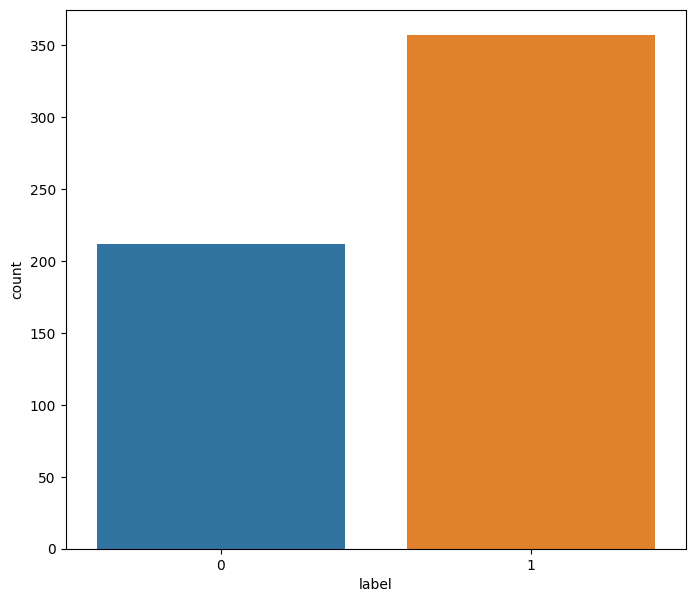

In [13]:
plt.figure(figsize=(8,7),dpi = 100)
sns.countplot(data = data_frame,x = 'label')

<Axes: xlabel='mean radius', ylabel='Count'>

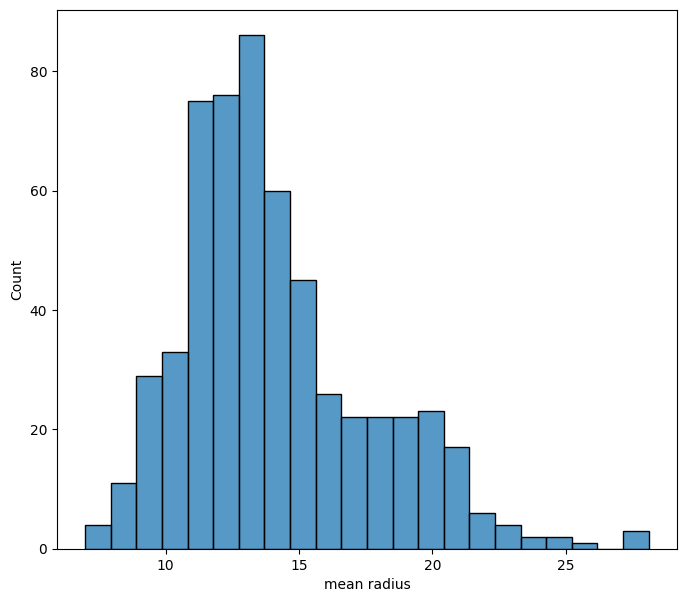

In [14]:
plt.figure(figsize=(8,7),dpi = 100)
sns.histplot(data = data_frame,x = 'mean radius')

<Axes: xlabel='mean texture'>

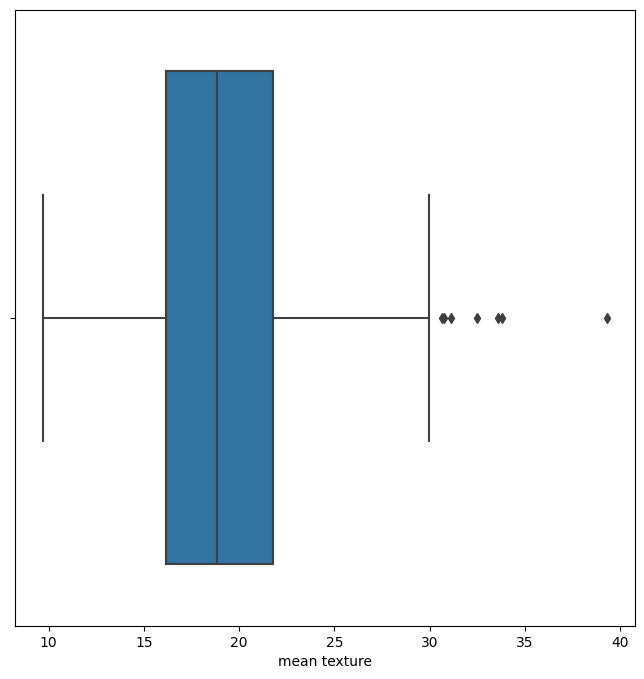

In [15]:
# Box Plot - Attribute texture_mean

plt.figure(figsize=(8,8),dpi = 100)
sns.boxplot(data = data_frame,x = 'mean texture')

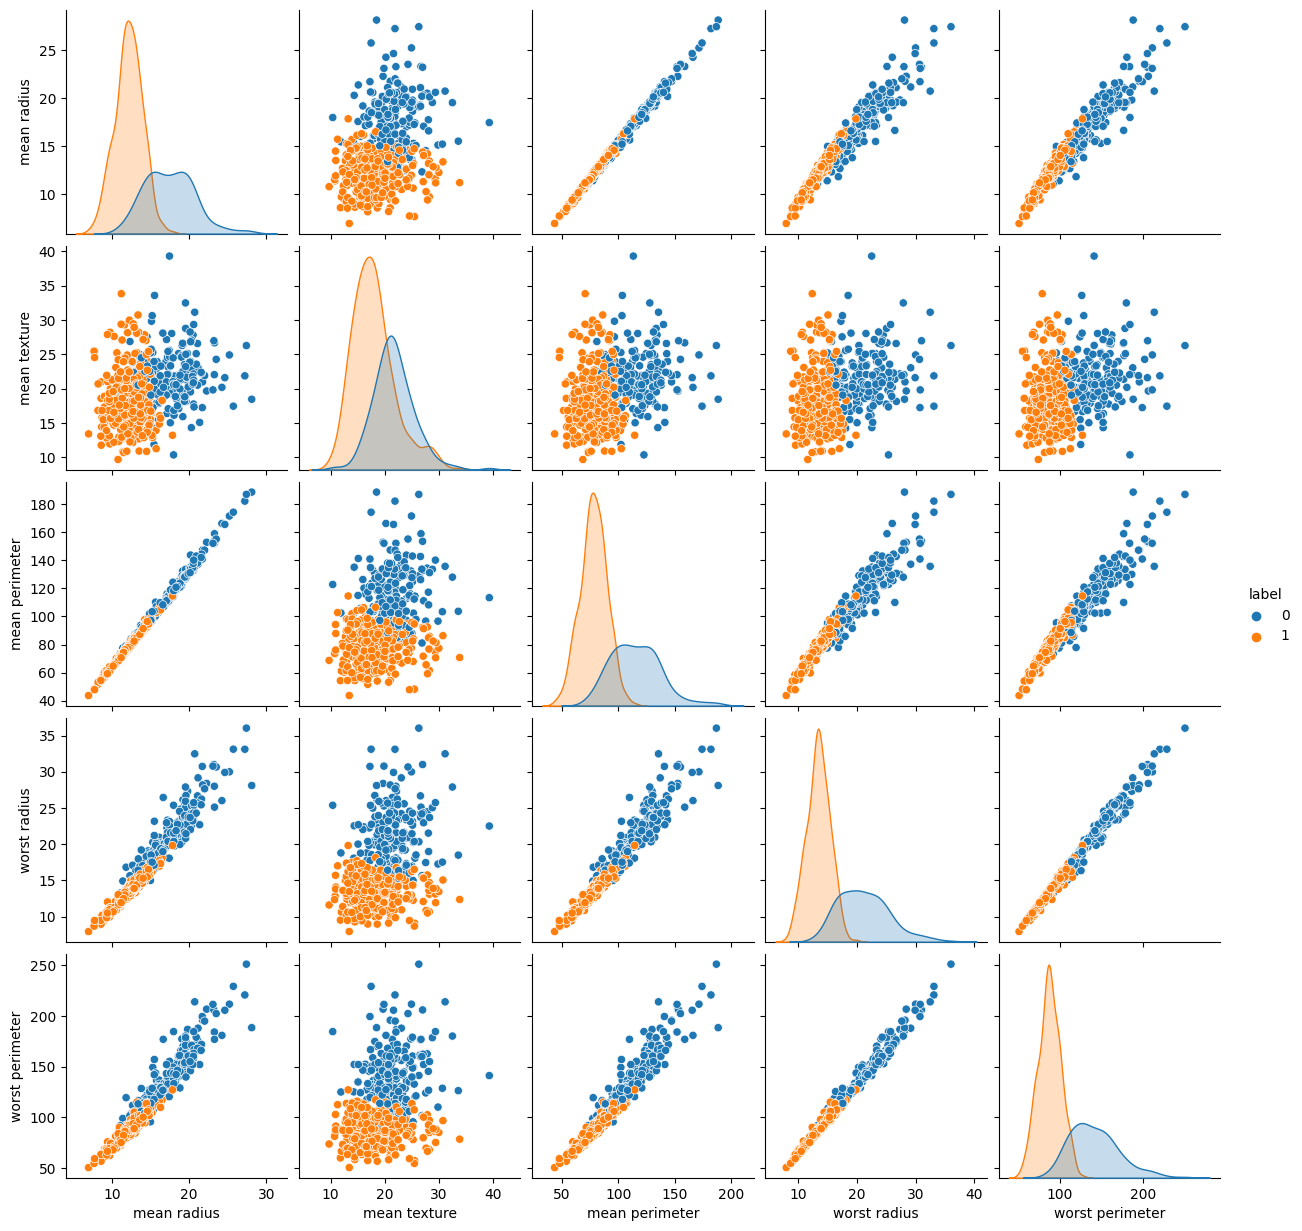

In [16]:

sns.pairplot(data_frame, hue="label", vars=["mean radius", "mean texture", "mean perimeter", "worst radius", "worst perimeter"])
plt.show()

<Axes: >

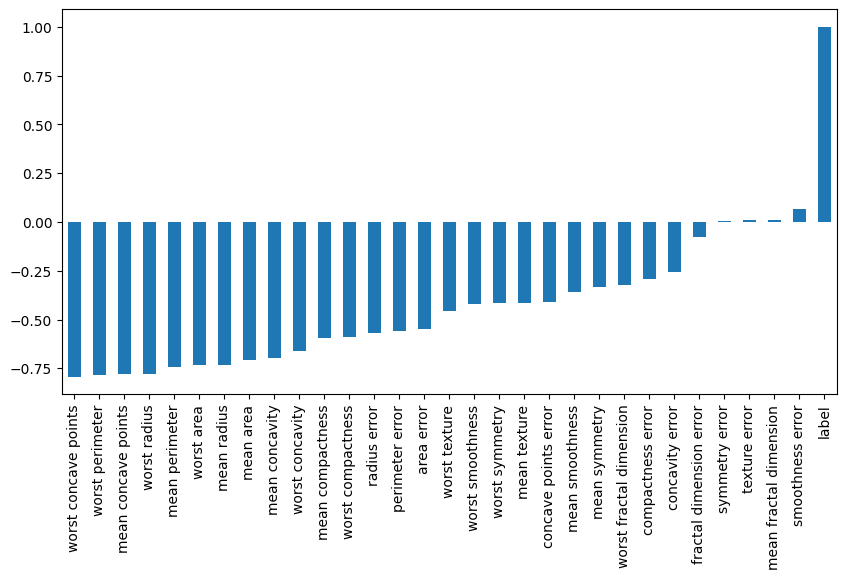

In [17]:
plt.figure(figsize=(10,5),dpi=100)
data_frame.corr()['label'].sort_values().plot(kind='bar')

In [18]:
##Feature Engineering

In [19]:
X=data_frame.drop(columns='label',axis=1)
X.shape

(569, 30)

In [20]:
y=data_frame['label']
y

0      0
1      0
2      0
3      0
4      0
      ..
564    0
565    0
566    0
567    0
568    1
Name: label, Length: 569, dtype: int64

In [21]:
X_train,X_test,y_train,y_test=train_test_split(X,y,test_size=0.2,random_state=2)

In [22]:
print(X_train.shape,X_test.shape,y_train.shape,y_test.shape)

(455, 30) (114, 30) (455,) (114,)


In [23]:
from sklearn.preprocessing import StandardScaler
sd=StandardScaler()

In [24]:
X_train_std=sd.fit_transform(X_train)
X_test_std=sd.transform(X_test)

In [25]:
X_test_std

array([[-0.04462793, -1.41612656, -0.05903514, ..., -0.18278004,
        -1.23064515, -0.6268286 ],
       [ 0.24583601, -0.06219797,  0.21802678, ...,  0.54129749,
         0.11047691,  0.0483572 ],
       [-1.26115925, -0.29051645, -1.26499659, ..., -1.35138617,
         0.269338  , -0.28231213],
       ...,
       [ 0.72709489,  0.45836817,  0.75277276, ...,  1.46701686,
         1.19909344,  0.65319961],
       [ 0.25437907,  1.33054477,  0.15659489, ..., -1.29043534,
        -2.22561725, -1.59557344],
       [ 0.84100232, -0.06676434,  0.8929529 , ...,  2.15137705,
         0.35629355,  0.37459546]])

In [26]:
import tensorflow as tf
tf.random.set_seed(3)
from tensorflow import keras 



In [27]:
model=keras.Sequential([
    keras.layers.Flatten(input_shape=(30,)),
    keras.layers.Dense(20, activation='relu'),
    keras.layers.Dense(2, activation='sigmoid')
])

In [28]:
model.compile(optimizer='adam',
              loss='sparse_categorical_crossentropy',
              metrics=['accuracy'])

In [29]:
#training the neural network

In [30]:
history=model.fit(X_train,y_train,validation_split=0.2,epochs=17)

Epoch 1/17
12/12 [==============================] - 1s 26ms/step - loss: 24.7141 - accuracy: 0.3681 - val_loss: 3.4290 - val_accuracy: 0.5275
Epoch 2/17
12/12 [==============================] - 0s 7ms/step - loss: 1.7898 - accuracy: 0.8297 - val_loss: 2.7797 - val_accuracy: 0.8462
Epoch 3/17
12/12 [==============================] - 0s 5ms/step - loss: 2.2833 - accuracy: 0.8434 - val_loss: 0.4105 - val_accuracy: 0.9341
Epoch 4/17
12/12 [==============================] - 0s 7ms/step - loss: 0.8861 - accuracy: 0.8544 - val_loss: 0.9172 - val_accuracy: 0.8132
Epoch 5/17
12/12 [==============================] - 0s 5ms/step - loss: 0.6883 - accuracy: 0.8929 - val_loss: 0.3883 - val_accuracy: 0.9341
Epoch 6/17
12/12 [==============================] - 0s 6ms/step - loss: 0.6216 - accuracy: 0.9121 - val_loss: 0.3577 - val_accuracy: 0.9121
Epoch 7/17
12/12 [==============================] - 0s 7ms/step - loss: 0.6287 - accuracy: 0.8874 - val_loss: 0.3699 - val_accuracy: 0.9121
Epoch 8/17
12/12 [

#Visualizing the accuracy and loss

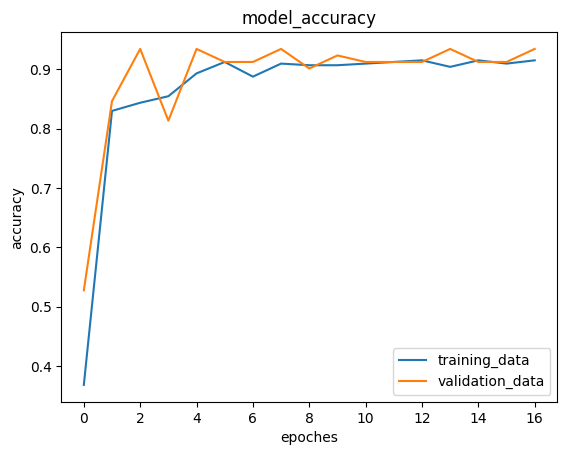

In [31]:
plt.plot(history.history['accuracy'])
plt.plot(history.history['val_accuracy'])
plt.title('model_accuracy')
plt.ylabel('accuracy')
plt.xlabel('epoches')

plt.legend(['training_data','validation_data'], loc='lower right')

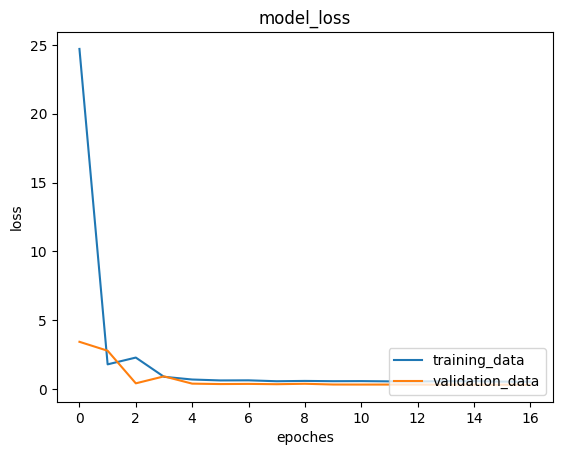

In [32]:
plt.plot(history.history['loss'])
plt.plot(history.history['val_loss'])
plt.title('model_loss')
plt.ylabel('loss')
plt.xlabel('epoches')

plt.legend(['training_data','validation_data'], loc='lower right')

# Accuracy of the model on test data 

In [37]:
loss,accuracy=model.evaluate(X_test_std,y_test)
print(accuracy)

4/4 [==============================] - 0s 4ms/step - loss: 1.7394 - accuracy: 0.1754
0.17543859779834747


In [39]:
print(X_test_std.shape)
print(X_test_std[0])

(114, 30)
[-0.04462793 -1.41612656 -0.05903514 -0.16234067  2.0202457  -0.11323672
  0.18500609  0.47102419  0.63336386  0.26335737  0.53209124  2.62763999
  0.62351167  0.11405261  1.01246781  0.41126289  0.63848593  2.88971815
 -0.41675911  0.74270853 -0.32983699 -1.67435595 -0.36854552 -0.38767294
  0.32655007 -0.74858917 -0.54689089 -0.18278004 -1.23064515 -0.6268286 ]


In [41]:
y_pred=model.predict(X_test_std)

4/4 [==============================] - 0s 4ms/step


In [44]:
y_pred.shape
y_pred[0]


array([0.86549586, 0.49656358], dtype=float32)

y_pred gives the prediction probability of each class for that data point 

In [46]:
Y_pred_pro= [np.argmax(i) for i in y_pred]

In [47]:
print(Y_pred_pro)

[0, 0, 0, 1, 1, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 1, 0, 0, 0, 1, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 1, 0, 0, 1, 0, 0, 1, 0, 1, 0, 1, 0, 1, 0, 0, 1, 1, 0, 1, 0, 1, 0, 0, 0, 1, 1, 1, 1, 0, 0, 0, 0, 0, 1, 1, 0, 0, 0, 1, 0, 0, 1, 1, 0, 0, 0, 1, 0, 1, 0, 0, 1, 0, 0, 0, 0, 1, 0, 1]


#Building the prediction system 

In [49]:
c

1/1 [==============================] - 0s 26ms/step
[[0.80640864 0.15736662]]
[0]
The tumor is Malignant


/usr/local/lib/python3.9/dist-packages/sklearn/base.py:439: UserWarning: X does not have valid feature names, but StandardScaler was fitted with feature names
  warnings.warn(


In [50]:
import pickle
filename='neural.sav'

In [51]:
pickle.dump(model,open(filename,'wb'))

In [53]:
loaded_model=pickle.load(open('neural.sav','rb'))


In [54]:
input_data = (11.76,21.6,74.72,427.9,0.08637,0.04966,0.01657,0.01115,0.1495,0.05888,0.4062,1.21,2.635,28.47,0.005857,0.009758,0.01168,0.007445,0.02406,0.001769,12.98,25.72,82.98,516.5,0.1085,0.08615,0.05523,0.03715,0.2433,0.06563)

# change the input_data to a numpy array
input_data_as_numpy_array = np.asarray(input_data)

# reshape the numpy array as we are predicting for one data point
input_data_reshaped = input_data_as_numpy_array.reshape(1,-1)

# standardizing the input data
input_data_std = sd.transform(input_data_reshaped)

prediction = loaded_model.predict(input_data_std)
print(prediction)

prediction_label = [np.argmax(prediction)]
print(prediction_label)

if(prediction_label[0] == 0):
  print('The tumor is Malignant')

else:
  print('The tumor is Benign')

1/1 [==============================] - 0s 91ms/step
[[0.80640864 0.15736662]]
[0]
The tumor is Malignant


/usr/local/lib/python3.9/dist-packages/sklearn/base.py:439: UserWarning: X does not have valid feature names, but StandardScaler was fitted with feature names
  warnings.warn(
